In [3]:
import pandas as pd

titanic = pd.read_csv('../data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [5]:
# 데이터 총 714개다, 누락값이 있다.
# 평균 29.7이다. 표준편차가 14.5      
# 대략 29.7 - 14.5 * 1.96 ~ 29.7 + 14.5 * 1.96 이 사이에 있다.
# 최소값 0.42 어린애가 있구나, 최대값 80 노인도 있구나.
# 평균 ~ 중앙값이랑 차이가 꽤 나면 값이 편향되어있구나.
# 0 ~ 25 : 약 20, 25 ~ 50 : 약 8, 50 ~ 75 : 약 10, 75 ~ 100 : 약 42

<Axes: xlabel='Age'>

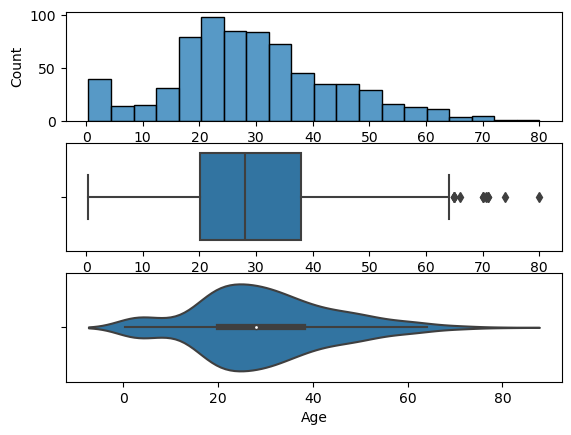

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplot(3,1,1)
sns.histplot(data = titanic, x = 'Age')
plt.subplot(3,1,2)
sns.boxplot(data = titanic, x = 'Age')
plt.subplot(3,1,3)
sns.violinplot(data = titanic, x = 'Age')

<Axes: ylabel='Count'>

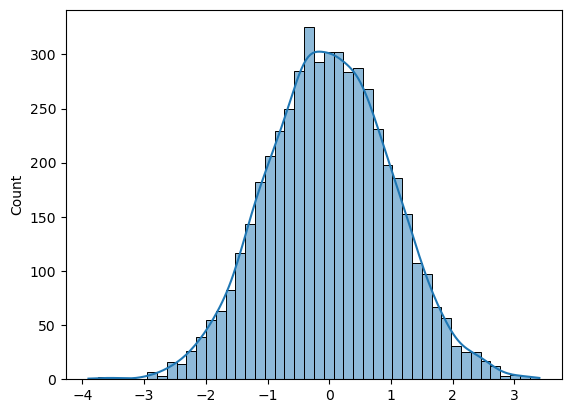

In [9]:
import numpy as np

arr = np.random.randn((5001))
sns.histplot(arr, kde=True)

In [12]:
stats.shapiro(arr)

C:\Users\admin\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9996957182884216, pvalue=0.6936493515968323)

In [11]:
from scipy import stats
stats.shapiro(titanic['Fare'])

ShapiroResult(statistic=0.5218917727470398, pvalue=1.0789998175301091e-43)

In [ ]:
stats.anderson(titanic['Fare'])

In [ ]:
stats.anderson(arr)

In [ ]:
print(titanic['Pclass'].value_counts())
print(titanic['Pclass'].value_counts() / len(titanic['Pclass'])) 

In [ ]:
p_cnt = titanic['Pclass'].value_counts()
plt.figure(figsize = (7, 3))
plt.subplot(1,2,1)
sns.countplot(data = titanic, x = 'Pclass')
plt.subplot(1,2,2)
plt.pie(p_cnt.values, labels = p_cnt.index, autopct = '%.2f%%') 

In [ ]:
# 이상치 판단
# IQR
IQR = titanic['Fare'].quantile(0.75) - titanic['Fare'].quantile(0.25)
high_border = titanic['Fare'].quantile(0.75) + IQR * 1.5
low_border = titanic['Fare'].quantile(0.25) - IQR * 1.5
print(high_border, low_border)

In [ ]:
titanic2 = titanic[(titanic['Fare'] < high_border) & (titanic['Fare'] > low_border)]
plt.subplot(3,1,1)
sns.histplot(data = titanic2, x = 'Fare')
plt.subplot(3,1,2)
sns.boxplot(data = titanic2, x = 'Fare')
plt.subplot(3,1,3)
sns.violinplot(data = titanic2, x = 'Fare')
print(stats.shapiro(titanic2['Fare']))

In [15]:
import numpy as np
z_score = np.abs(titanic['Fare'] - titanic['Fare'].mean()) / titanic['Fare'].std()
z_score

0      0.502163
1      0.786404
2      0.488580
3      0.420494
4      0.486064
         ...   
886    0.386454
887    0.044356
888    0.176164
889    0.044356
890    0.492101
Name: Fare, Length: 891, dtype: float64

ShapiroResult(statistic=0.7434647083282471, pvalue=2.620056603482912e-34)


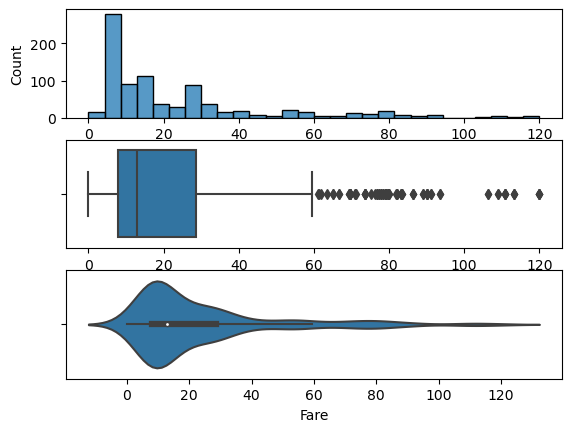

In [14]:
titanic3 = titanic[z_score < 2]
plt.subplot(3,1,1)
sns.histplot(data = titanic3, x = 'Fare')
plt.subplot(3,1,2)
sns.boxplot(data = titanic3, x = 'Fare')
plt.subplot(3,1,3)
sns.violinplot(data = titanic3, x = 'Fare')
print(stats.shapiro(titanic3['Fare']))

In [ ]:
(512 - 32) / 49